In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.linalg as la
import random
import math
from scipy.stats import norm
import scipy
from scipy.stats import multivariate_normal

In [3]:
# test the standard shape

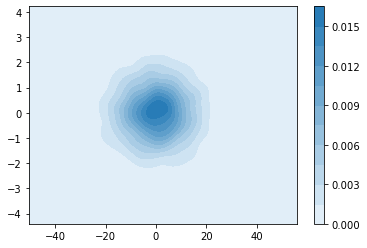

In [4]:
sigma = np.array([[100,0],[0,1]]) # 协方差
mu = np.zeros(2) # 生成 array([0., 0.])
ys = np.random.multivariate_normal(mu, sigma, 8000) # 生成满足此二维分布的样本对，这个里面有1000对
sns.kdeplot(ys[:,0], ys[:,1],shade = True, cbar = True )
#plt.axis([-3.5,3.5,-3.5,3.5])
pass


In [5]:
# define potenital energy function
def U(x, cov):
    cov_1 = la.inv(cov)
    UE= (x @ cov_1 @ x)/2.0
    return UE

# define gradient of potential energy

def d_U (x, cov):
    cov_1 = la.inv(cov)
    d_UE = cov_1 @ x
    return d_UE

In [6]:
# define Kinetic energy function

def K(p):
    KE = (p @ p)/2.0
    return KE

In [13]:
delta = 0.01
nSamples = 5000 # number of samples
L = 150 # leapfrog steps
x = np.zeros((nSamples + 1,2))

In [14]:
x_0 = np.array([0,0]) # current_position
x[0] = x_0
cov = np.array([[100,0],[0,1]])

In [15]:
for t in range(nSamples):

    # sample random momentum
    p_0 = np.random.normal(0,1,2)
    
# leapfrog

     # position/sample
    xStar = x[t]
    # gradient
    gnew = d_U(xStar,cov)
    # momentum, make a half step for momentum at the beginning
    pStar = p_0 - delta * gnew/2.0
#lepfrog steps
    for j in range(L-1):
    # postion/sample,full step for position/sample
        xStar = xStar + delta * pStar
    # find new gradient
        gnew = d_U(xStar,cov)
    # momentum,full step of momentum
        pStar = pStar - delta * gnew
        
    # last half step
    xStar = xStar + delta * pStar
    gnew = d_U(xStar,cov)
    pStar =pStar - delta /2.0 * gnew

# evaluate energy

    U_0 = U(x[t],cov)
    UStar = U(xStar,cov)
    
    K_0 = K(p_0)
    KStar = K(pStar)
# acceptance
    alpha = min(1,np.exp(- UStar + U_0 - KStar + K_0))
    uc= np.random.rand()
    
    if uc < alpha:
        x[t+1] = xStar
    else:
        x[t+1] = x[t]
    

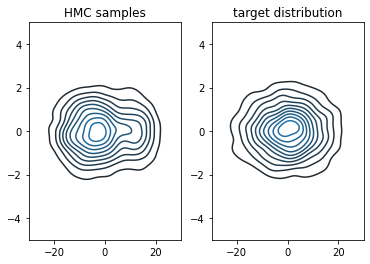

In [16]:
fig = plt.figure()
axx = fig.add_subplot(121)
#plt.plot(bx_sample,by_sample,"r.")
sns.kdeplot(x[:, 0], x[:, 1]) #,shade = True, cbar = True )
axx.set_title('HMC samples')
plt.axis([-30,30,-5,5])


axx = fig.add_subplot(122)
sns.kdeplot(ys[:,0], ys[:,1]) #,shade = True, cbar = True )
#plt.plot(bx_sample,by_sample,"r.")
axx.set_title('target distribution')
plt.axis([-30,30,-5,5])
pass

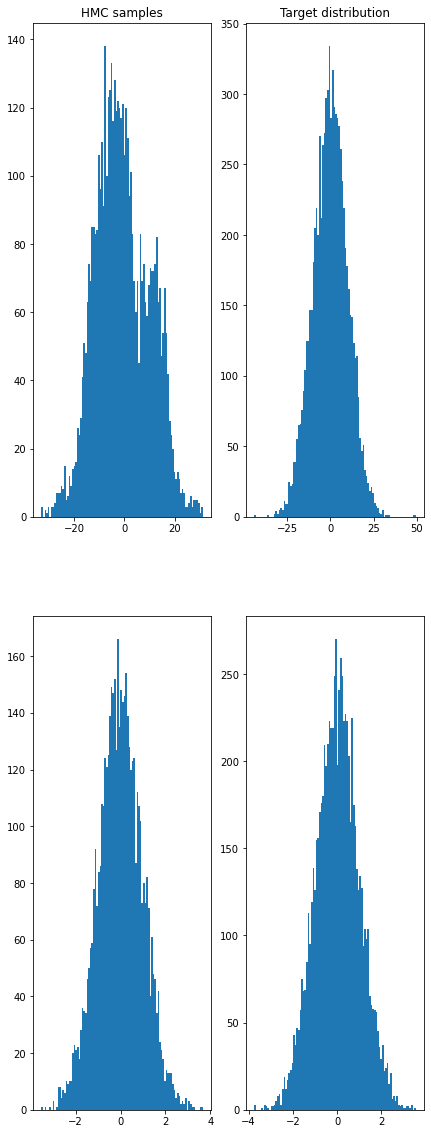

In [17]:
fig = plt.figure(figsize =(7,20))
axx = fig.add_subplot(221)
axx.hist(x[:, 0], bins=100)
axx.set_title('HMC samples')

axx = fig.add_subplot(222)
axx.hist(ys[:,0], bins=100)
axx.set_title('Target distribution')

axx = fig.add_subplot(223)
axx.hist(x[:, 1], bins=100)

axx = fig.add_subplot(224)
axx.hist(ys[:,1], bins=100)

plt.show()

In [14]:
# test on sandbox

In [15]:
def s_topo(s_frame):
    a_topo = s_frame[10:210, 50:250]
    #a_topo = a
    aa_topo = 1.0/np.sum(a_topo) * a_topo # probability function,sum=1
    print(np.shape(aa_topo))
    
    plt.pcolormesh(aa_topo)
    plt.plot(20,100,'ro')
    plt.colorbar()
    return aa_topo

In [16]:
a = np.load ('gibbs_topo2.npy')

(200, 200)
11.069929374812796
9.919345093488895


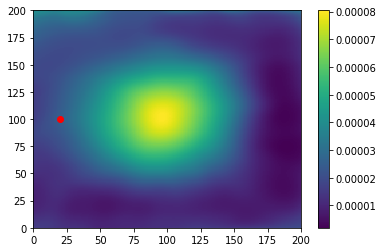

In [17]:
# first transform probability function to -log
final_topo = -np.log(s_topo(a)) # now final_topo is actually U(x)
print(final_topo[0][0])
print(final_topo[98][135])
#print(np.sum(final_topo))

In [18]:
# define an equation of a surface using four points,and return Ux
def U(a, frame): # give the position x[,]
    x = a[0] # position in x axis
    y = a[1] # position in y axis
    
    mesh_frame = creat_mesh(frame)
    UE = -np.log(mesh_frame(x,y))
      
    return UE
    

In [19]:
# define sandbox gradient of potential energy

def d_U(a, frame):
    x = a[0] # position in x axis
    y = a[1] # position in y axis
    
    mesh_frame = creat_mesh(frame)
    U = -np.log(mesh_frame)
    gra_Ux,gra_Uy = np.gradient(U)
    mesh_gra_Ux = create_mesh(gra_Ux)
    mesh_gra_Uy = create_mesh(gra_Uy)
    d_Ux = mesh_gra_Ux(x,y)
    d_Uy = mesh_gra_Uy(x,y)
    
    return np.array([d_Ux,d_Uy])

In [20]:
# define Kinetic energy function
def K(p):
    KE = (p @ p)/2.0
    return KE

In [21]:
delta = 0.01 # 步长也是
nSamples = 200 # number of samples
L = 100 # leapfrog steps
x = np.zeros((nSamples,2)) # an array to save the postion
x_0 = np.array([100,100]) # initial position,这个位置也要选好
x[0] = x_0

xmax = mesh_frame_max
ymax = mesh_frame_ymax
#inter = S_U(x[0],final_topo) # sandbox potenital energy function
#print(inter)
#print(x[0])

In [ ]:
'''
t = 0

while t < nSamples-1:
    t = t+1
    # sample random momentum
    p_0 = norm.rvs(loc=0,scale=1,size=2)
    
# simulate hamiltonian dynamics
    # momentum
    pStar = p_0
    # position/sample
    xStar = x[t-1]
    
   # print("before HMC:",xStar)
    
    # if the xStar[,] is inside the frame or not
    if 0<= xStar[0] < xmax-2 and 0 <= xStar[1] < ymax-2:
    
        # gradient
        gnew = S_d_U(xStar,final_topo)
    # leapfrog steps
        for j in range(L):
        # momentum,first half step of momentum
            pStar = pStar - delta/2.0 * gnew
        # postion/sample,first full step for position/sample
            xStar = xStar + delta * pStar
            
            if 0<= xStar[0] < xmax-2 and 0 <= xStar[1] < ymax-2:   
            
            # find new gradient
                gnew = S_d_U(xStar,final_topo)
            # last half step
                pStar =pStar - delta /2.0 * gnew
            #print("after HMC:",xStar)
        
    # evaluate energy
        if 0<= xStar[0] < xmax-2 and 0 <= xStar[1] < ymax-2: 
            U_0 = S_U(x[t-1],final_topo)
            UStar = S_U(xStar,final_topo)

            K_0 = K(p_0)
            KStar = K(pStar)
        # acceptance
            alpha = min(1,np.exp(- UStar + U_0 - KStar + K_0))
            uc= random.uniform(0.6,1)

            if uc < alpha:
                x[t] = xStar
                #print('yes')
            else:
                x[t] = x[t-1]
                #print('no')
'''


In [ ]:
'''
orbit_x = np.zeros((nSamples + 1,2))
orbit_x [0] = x_0 # initial position

for i in range (1,nSamples +1):
    orbit_x[i] = x[i-1]
    #print(i)
a_topo = a[10:210, 50:250]
aa_topo = 1.0/np.sum(a_topo) * a_topo # probability function,sum=1
#plt.pcolormesh(aa_topo)
#plt.colorbar()

'''

In [ ]:
'''
ax = plt.subplot(111)
#sns.kdeplot(orbit_x[:, 0], orbit_x[:, 1])
plt.pcolormesh(aa_topo)
plt.plot(orbit_x[:,0], orbit_x[:,1], alpha=0.2)
plt.scatter(orbit_x[:1,0], orbit_x[:1,1],  c='red', s=30) # print the initial position with color yellow
plt.scatter(orbit_x[1:,0], orbit_x[1:,1],  c=np.arange(nSamples)[::-1], cmap='Greens') # print other points
#ax.axis('square')
#plt.axis([-3.5,3.5,-3.5,3.5])
pass

'''

In [22]:
for t in range(nSamples):

    # sample random momentum
    p_0 = np.random.normal(0,1,2)
    
# leapfrog

     # position/sample
    xStar = x[t]
# if the xStar[,] is inside the frame or not
    if 0<= xStar[0] < xmax-2 and 0 <= xStar[1] < ymax-2:
        # gradient
        gnew = d_U(xStar,cov)
        # momentum, make a half step for momentum at the beginning
        pStar = p_0 - delta * gnew/2.0
    #lepfrog steps
        for j in range(L-1):
        # postion/sample,full step for position/sample
            xStar = xStar + delta * pStar
            
            if 0<= xStar[0] < xmax-2 and 0 <= xStar[1] < ymax-2:
            # find new gradient
                gnew = d_U(xStar,cov)
            # momentum,full step of momentum
                pStar = pStar - delta * gnew

        # last half step
        xStar = xStar + delta * pStar
        
        if 0<= xStar[0] < xmax-2 and 0 <= xStar[1] < ymax-2:
        
            gnew = d_U(xStar,cov)
            pStar =pStar - delta /2.0 * gnew

    # evaluate energy
        if 0<= xStar[0] < xmax-2 and 0 <= xStar[1] < ymax-2: 
            U_0 = U(x[t],cov)
            UStar = U(xStar,cov)

            K_0 = K(p_0)
            KStar = K(pStar)
        # acceptance
            alpha = min(1,np.exp(- UStar + U_0 - KStar + K_0))
            uc= np.random.rand()

            if uc < alpha:
                x[t+1] = xStar
            else:
                x[t+1] = x[t]


In [23]:
a_topo = a[10:210, 50:250]
aa_topo = 1.0/np.sum(a_topo) * a_topo # probability function,sum=1
#plt.pcolormesh(aa_topo)
#plt.colorbar()

In [29]:
np.shape(x)

(200, 2)

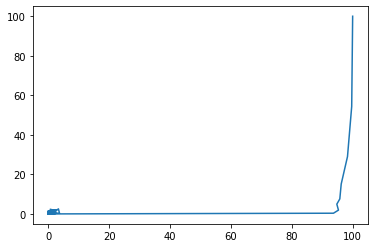

In [31]:
ax = plt.subplot(111)
#sns.kdeplot(orbit_x[:, 0], orbit_x[:, 1])
#plt.pcolormesh(aa_topo)
plt.plot(x[:,0], x[:,1])
#plt.plot(x[:,0], x[:,1], alpha=0.2)
#plt.scatter(x[:1,0], x[:1,1],  c='red', s=30) # print the initial position with color yellow
#plt.scatter(x[1:,0], x[1:,1],  c=np.arange(nSamples)[::-1], cmap='Greens') # print other points
#ax.axis('square')
#plt.axis([-3.5,3.5,-3.5,3.5])
pass